In [1]:
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import colorcet as cc
import platform
import traceback
import xarray
import xbout

# sys.path.append(r"C:\Users\Mike\OneDrive\Project\sdtools")
sys.path.append(os.path.join(onedrive,r"Project\sdtools"))

from analysis import *
from analysis_sk import *
from sk_plotting_functions import *
import h2D


%load_ext autoreload
%autoreload 2

lib = library()

print("Done")

Done


In [2]:
a7 = h2D.Load.case_2D(r"C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a6-fromben", gridfilepath = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc")

C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc
C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a6-fromben


# Coefficient functions
Here you go!

- First column = distance from separatrix at OMP [m]
- Second column = value of transport coefficient [m^2/s]

- First coefficient = particle diffusivity D
- Second coefficient = electron heat diffusivity chi_e
- Third coefficient = ion heat diffusivity chi_i (= chi_e)

Cheers,
Matteo

In [14]:
file = r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\Anomalous coeffs 2022-11-21\b2.transport.inputfile"

with open(file) as f:
    lines = f.readlines()

lines

[' &TRANSPORT\n',
 ' \n',
 ' NO_PFLUX=T,\n',
 ' ndata(1, 1 , 1 )= 4 ,\n',
 ' tdata(1,  1 , 1 , 1 )= -0.2 , tdata(2,  1 , 1 , 1 )= 0.300 ,\n',
 ' tdata(1,  2 , 1 , 1 )= -0.0001, tdata(2,  2 , 1 , 1 )= 0.300 ,\n',
 ' tdata(1,  3 , 1 , 1 )= 0.0 , tdata(2,  3 , 1 , 1 )= 1.000 ,\n',
 ' tdata(1,  4 , 1 , 1 )= 0.05 , tdata(2,  4 , 1 , 1 )= 1.000 ,\n',
 ' ndata(1, 3 , 1 )= 7 ,\n',
 ' tdata(1,  1 , 3 , 1 )= -0.2 , tdata(2,  1 , 3 , 1 )= 0.450 ,\n',
 ' tdata(1,  2 , 3 , 1 )= -0.0001 , tdata(2,  2 , 3 , 1 )= 0.450 ,\n',
 ' tdata(1,  3 , 3 , 1 )= 0.0 , tdata(2,  3 , 3 , 1 )= 3.000 ,\n',
 ' tdata(1,  4 , 3 , 1 )= 0.0015 , tdata(2,  4 , 3 , 1 )= 3.000 ,\n',
 ' tdata(1,  5 , 3 , 1 )= 0.002 , tdata(2,  5 , 3 , 1 )= 3.000 ,\n',
 ' tdata(1,  6 , 3 , 1 )= 0.006 , tdata(2,  6 , 3 , 1 )= 3.0 ,\n',
 ' tdata(1,  7 , 3 , 1 )= 0.05 , tdata(2,  7 , 3 , 1 )= 3.00 ,\n',
 ' ndata(1, 4 , 0 )= 7 ,\n',
 ' tdata(1,  1 , 4 , 0 )= -0.2 , tdata(2,  1 , 4 , 0 )= 0.450 ,\n',
 ' tdata(1,  2 , 4 , 0 )= -0.0001 , tdata(2,  2 

In [6]:
D = {
    -0.0001 : 0.300,
    0.0 : 1.000
    }

Chi_e = {
    -0.0001 : 0.450,
    0.0 : 3.000
    }

Chi_i = {
    -0.0001 : 0.450,
    0.0 : 3.000
    }

## Making heaviside function

In [7]:
def H(x):
    x[x>0] = 1
    x[x<0] = 0
    return x

x = np.array(range(32))

df = pd.DataFrame()

xsep = 16
df["x"] = x

df["D"] = H(x - (xsep)) * 1.00 + H((xsep+1) - x) * 3.00

df

,x,D
0,0,3.0
1,1,3.0
2,2,3.0
3,3,3.0
4,4,3.0
5,5,3.0
6,6,3.0
7,7,3.0
8,8,3.0
9,9,3.0


## Making X index array

In [5]:
self = a7

nx = self.ds.metadata["nx"]
MXG = self.ds.metadata["MXG"]

i = np.array(range(nx-4))

x = (i + 0.5) / (nx - 2*MXG)

x

xi = x * (nx - 2*MXG) - 0.5
xi

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27.])

# Making core function

In [10]:
%matplotlib inline

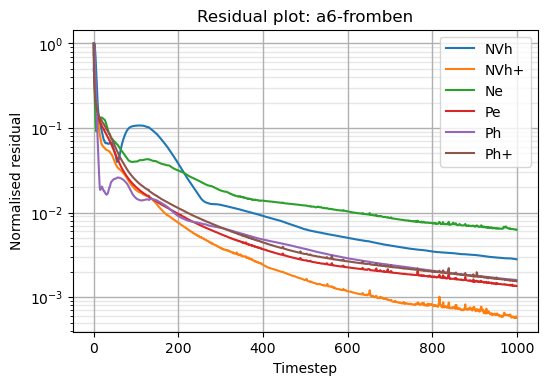

In [4]:
a6.plot_residuals()

In [11]:
self.derive_vars()

In [26]:
meta = self.ds.metadata

print(f' - ixseps1: {meta["ixseps1"]}    // id of first cell after separatrix 1')
print(f' - ixseps2: {meta["ixseps2"]}    // id of first cell after separatrix 2')
print(f' - jyseps1_1: {meta["jyseps1_1"]}    // near lower inner')
print(f' - jyseps1_2: {meta["jyseps1_2"]}    // near lower outer')
print(f' - jyseps2_1: {meta["jyseps2_1"]}    // near upper outer')
print(f' - jyseps2_2: {meta["jyseps2_2"]}    // near lower outer')
print(f' - ny_inner: {meta["ny_inner"]}    // no. poloidal cells in-between divertor regions')
print(f' - ny: {meta["ny"]}    // total cells in Y (poloidal, does not include guard cells)')
print(f' - nx: {meta["nx"]}    // total cells in X (radial, includes guard cells)')

 - ixseps1: 16    // id of first cell after separatrix 1
 - ixseps2: 16    // id of first cell after separatrix 2
 - jyseps1_1: 7    // near lower inner
 - jyseps1_2: 47    // near lower outer
 - jyseps2_1: 31    // near upper outer
 - jyseps2_2: 87    // near lower outer
 - ny_inner: 40    // no. poloidal cells in-between divertor regions
 - ny: 96    // total cells in Y (poloidal, does not include guard cells)
 - nx: 32    // total cells in X (radial, includes guard cells)


In [78]:
region = self.ds.isel(x=x_slice, theta = theta_slice)

region.theta

<xarray.DataArray 'theta' (theta: 104)>
array([ 0.049087,  0.147262,  0.245437,  0.343612,  0.441786,  0.539961,
        0.638136,  0.736311,  0.834486,  0.93266 ,  1.030835,  1.12901 ,
        1.227185,  1.325359,  1.423534,  1.521709,  1.619884,  1.718058,
        1.816233,  1.914408,  2.012583,  2.110758,  2.208932,  2.307107,
        2.405282,  2.503457,  2.601631,  2.699806,  2.797981,  2.896156,
        2.99433 ,  3.092505,  3.19068 ,  3.288855,  3.38703 ,  3.485204,
        3.583379,  3.681554,  3.779729,  3.877903,  3.976078,  4.074253,
        4.172428,  4.270603,  4.368777,  4.466952,  4.565127,  4.663302,
        4.761476,  4.859651,  4.957826,  5.056001,  5.154175,  5.25235 ,
        5.350525,  5.4487  ,  5.546875,  5.645049,  5.743224,  5.841399,
        5.939574,  6.037748,  6.135923,  6.234098,  6.332273,  6.430447,
        6.528622,  6.626797,  6.724972,  6.823147,  6.921321,  7.019496,
        7.117671,  7.215846,  7.31402 ,  7.412195,  7.51037 ,  7.608545,
        7.706719,  7.804894,  7.903069,  8.001244,  8.099419,  8.197593,
        8.295768,  8.393943,  8.492118,  8.590292,  8.688467,  8.786642,
        8.884817,  8.982991,  9.081166,  9.179341,  9.277516,  9.375691,
        9.473865,  9.57204 ,  9.670215,  9.76839 ,  9.866564,  9.964739,
       10.062914, 10.161089])
Coordinates:
  * theta    (theta) float64 0.04909 0.1473 0.2454 0.3436 ... 9.965 10.06 10.16
Attributes:
    metadata:  {'BOUT_VERSION': 5.0, 'iteration': 999, 'zperiod': 1, 'MXSUB':...
    options:   # Tokamak diffusion, parallel conduction, and sheath boundary\...
    geometry:  toroidal
    regions:   {'lower_inner_PFR': <xbout.region.Region>\n\tname\tlower_inner...

In [131]:
def make_xtheta(region):
    """ 
    This pads x and theta so that they can be
    plotted on a X,Y grid
    """
    r_x = region.x
    r_theta = region.theta

    f = np.zeros((len(r_theta),len(r_x)))
    new_x = []
    new_theta = []

    for i in range(len(r_theta)):
        new_x.append(r_x)
    for i in range(len(r_x)):
        new_theta.append(r_theta.values)

    new_theta = np.concatenate(new_theta)
    new_x = np.concatenate(new_x)

    return new_x, new_theta

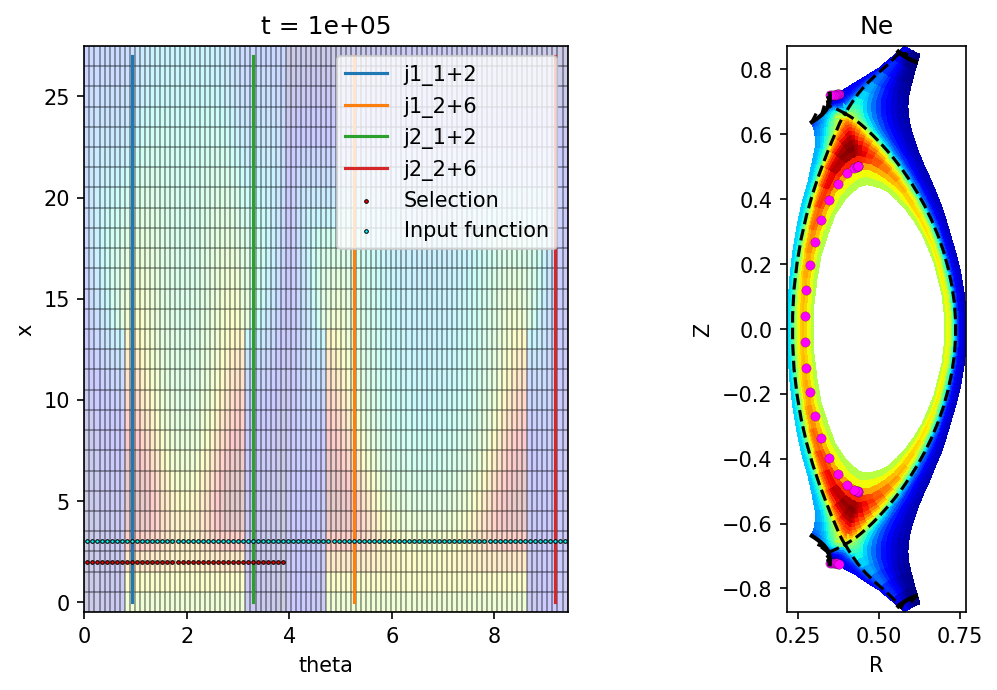

In [320]:
def H(x):
    x[x>0] = 1
    x[x<0] = 0
    return x

meta = self.ds.metadata
jyseps1_1 = meta["jyseps1_1"]
jyseps1_2 = meta["jyseps1_2"]
jyseps2_1 = meta["jyseps2_1"]
jyseps2_2 = meta["jyseps2_2"]
MXG = meta["MYG"]

fig, axes = plt.subplots(1,2, figsize=(8,5), dpi = 150, gridspec_kw={'width_ratios': [2.5, 1]})

self.ds["Ne"].isel(t=-1).plot(ax = axes[0], alpha = 0.2, edgecolors = "black", linewidths = 0.05, cmap = "jet")
self.ds["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[1], linewidths = 0.05, cmap = "jet")

x_slice = slice(2,3)
# theta_slice = slice(jyseps1_2+6 + 1, jyseps2_2+6 + 1)
theta_slice = slice(None, meta["ny_inner"])
# x_slice = slice(None, None)
# theta_slice = slice(None, None)


region = self.ds.isel(x=x_slice, theta = theta_slice)

r = region.R
z = region.Z

new_x, new_theta = make_xtheta(region)

y = self.ds.theta.values

input_fun_y = H(y - jyseps1_2 + 3*MXG + 1)
input_y = np.ma.MaskedArray(self.ds.theta.values)
input_y.mask = input_fun_y.astype(bool)
input_y = input_y.compressed()

axes[1].scatter(x = r, y = z, s = 20, c = "magenta", edgecolors = "black", linewidths = 0.1)

axes[0].plot([self.ds.theta[jyseps1_1+2]]*np.ones_like(self.ds.x), self.ds.x, label = "j1_1+2")
axes[0].plot([self.ds.theta[jyseps1_2+6]]*np.ones_like(self.ds.x), self.ds.x, label = "j1_2+6")
axes[0].plot([self.ds.theta[jyseps2_1+2]]*np.ones_like(self.ds.x), self.ds.x, label = "j2_1+2")
axes[0].plot([self.ds.theta[jyseps2_2+6]]*np.ones_like(self.ds.x), self.ds.x, label = "j2_2+6")
axes[0].scatter(x = new_theta, y = new_x, s = 3, c = "red", edgecolors = "black", linewidths = 0.5, label = "Selection", zorder = 20)

axes[0].scatter(x = input_y, y = [3] * len(input_y), s = 3, c = "cyan", edgecolors = "black", linewidths = 0.5, label = "Input function", zorder = 20)
axes[0].legend()

# Remove colorbars. hardcoded
fig.axes[-1].remove()
fig.axes[2].remove()

# axes[0].collections[-1].colorbar.remove()


In [280]:
y_idx = np.array(range(len(self.ds.theta.values)))
input_fun_y = H(y_idx - jyseps1_2 + 3*MXG + 1)   # in index space
input_y_idx = np.ma.MaskedArray(y_idx)
input_y_idx.mask = ~input_fun_y.astype(bool)
# input_y = input_y.compressed()

In [290]:
input_y = self.ds.theta.values
input_y = input_y[(input_y_idx.compressed())]
input_y

array([ 4.07425297,  4.17242774,  4.27060251,  4.36877728,  4.46695205,
        4.56512682,  4.6633016 ,  4.76147637,  4.85965114,  4.95782591,
        5.05600068,  5.15417545,  5.25235022,  5.35052499,  5.44869976,
        5.54687453,  5.6450493 ,  5.74322407,  5.84139884,  5.93957361,
        6.03774838,  6.13592315,  6.23409792,  6.33227269,  6.43044746,
        6.52862223,  6.626797  ,  6.72497177,  6.82314654,  6.92132131,
        7.01949609,  7.11767086,  7.21584563,  7.3140204 ,  7.41219517,
        7.51036994,  7.60854471,  7.70671948,  7.80489425,  7.90306902,
        8.00124379,  8.09941856,  8.19759333,  8.2957681 ,  8.39394287,
        8.49211764,  8.59029241,  8.68846718,  8.78664195,  8.88481672,
        8.98299149,  9.08116626,  9.17934103,  9.27751581,  9.37569058,
        9.47386535,  9.57204012,  9.67021489,  9.76838966,  9.86656443,
        9.9647392 , 10.06291397, 10.16108874])

# Now with masking

In [ ]:
def H(x):
    x[x>0] = 1
    x[x<0] = 0
    return x

meta = self.ds.metadata
jyseps1_1 = meta["jyseps1_1"]
jyseps1_2 = meta["jyseps1_2"]
jyseps2_1 = meta["jyseps2_1"]
jyseps2_2 = meta["jyseps2_2"]
MXG = meta["MYG"]

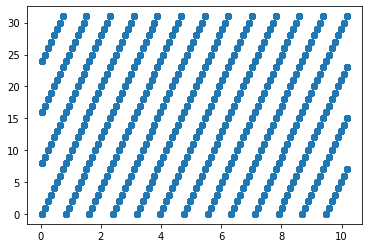

In [302]:
full_x = np.concatenate([self.ds.x.values] * len(self.ds.theta.values))
full_theta = np.concatenate([self.ds.theta.values] * len(self.ds.x.values))

plt.scatter(full_theta, full_x)
# plt.scatter(new_theta, new)x)

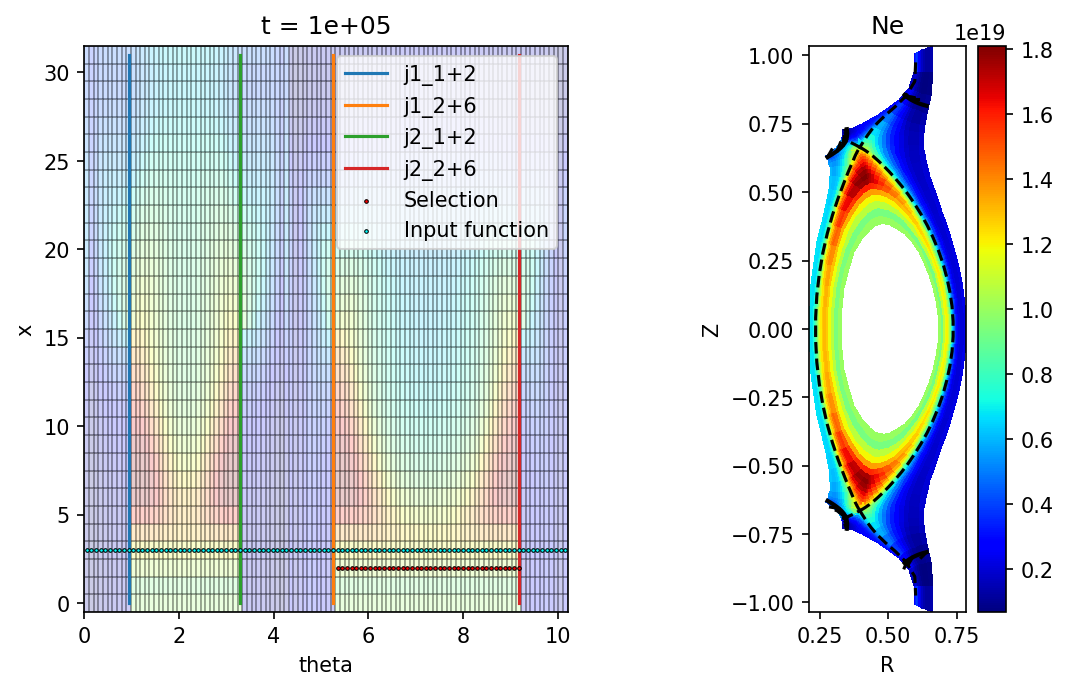

In [291]:
x_slice = slice(2,3)
theta_slice = slice(jyseps1_2+6 + 1, jyseps2_2+6 + 1)


region = self.ds.isel(x=x_slice, theta = theta_slice)

r = region.R
z = region.Z

new_x, new_theta = make_xtheta(region)

y = self.ds.theta.values

input_fun_y = H(y - jyseps1_2 + 3*MXG + 1)
input_y = np.ma.MaskedArray(self.ds.theta.values)
input_y.mask = input_fun_y.astype(bool)
input_y = input_y.compressed()


fig, axes = plt.subplots(1,2, figsize=(8,5), dpi = 150, gridspec_kw={'width_ratios': [2.5, 1]})

# self.ds["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[1], linewidths = 0.05, cmap = "jet")
# axes[1].scatter(x = r, y = z, s = 20, c = "magenta", edgecolors = "black", linewidths = 0.1)

self.ds["Ne"].isel(t=-1).plot(ax = axes[0], alpha = 0.2, edgecolors = "black", linewidths = 0.05, cmap = "jet")
axes[0].plot([self.ds.theta[jyseps1_1+2]]*np.ones_like(self.ds.x), self.ds.x, label = "j1_1+2")
axes[0].plot([self.ds.theta[jyseps1_2+6]]*np.ones_like(self.ds.x), self.ds.x, label = "j1_2+6")
axes[0].plot([self.ds.theta[jyseps2_1+2]]*np.ones_like(self.ds.x), self.ds.x, label = "j2_1+2")
axes[0].plot([self.ds.theta[jyseps2_2+6]]*np.ones_like(self.ds.x), self.ds.x, label = "j2_2+6")
axes[0].scatter(x = new_theta, y = new_x, s = 3, c = "red", edgecolors = "black", linewidths = 0.5, label = "Selection", zorder = 20)

axes[0].scatter(x = input_y, y = [3] * len(input_y), s = 3, c = "cyan", edgecolors = "black", linewidths = 0.5, label = "Input function", zorder = 20)
axes[0].legend()

# Remove colorbars. hardcoded
# fig.axes[-1].remove()
# fig.axes[2].remove()

# axes[0].collections[-1].colorbar.remove()


# Now by reconstructing input file x and y

In [305]:
new = h2D.Load.case_2D(
    r"C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a6-fromben", 
    gridfilepath = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc",
    keep_boundaries = False)

    

C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc
C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a6-fromben


In [316]:
self = new
def H(x):
    x[x>0] = 1
    x[x<0] = 0
    return x

meta = self.ds.metadata
jyseps1_1 = meta["jyseps1_1"]
jyseps1_2 = meta["jyseps1_2"]
jyseps2_1 = meta["jyseps2_1"]
jyseps2_2 = meta["jyseps2_2"]
ny_inner = meta["ny_inner"]
MXG = meta["MYG"]

In [317]:
ny_inner

40

In [322]:
y_idx = np.array(range(len(self.ds.theta.values)))
y = np.zeros_like(y_idx)
y[:ny_inner] = 2*np.pi*(y_idx[:ny_inner] - 0.5 - jyseps1_1)
y[ny_inner:] = 2*np.pi*(y_idx[ny_inner:] - 0.5 - jyseps1_1 - (jyseps1_2 - jyseps2_1))

y

array([-47, -40, -34, -28, -21, -15,  -9,  -3,   3,   9,  15,  21,  28,
        34,  40,  47,  53,  59,  65,  72,  78,  84,  91,  97, 103, 109,
       116, 122, 128, 135, 141, 147, 153, 160, 166, 172, 179, 185, 191,
       197, 103, 109, 116, 122, 128, 135, 141, 147, 153, 160, 166, 172,
       179, 185, 191, 197, 204, 210, 216, 223, 229, 235, 241, 248, 254,
       260, 267, 273, 279, 285, 292, 298, 304, 311, 317, 323, 329, 336,
       342, 348, 354, 361, 367, 373, 380, 386, 392, 398, 405, 411, 417,
       424, 430, 436, 442, 449])

In [315]:
ny_inner

NameError: name 'ny_inner' is not defined

In [230]:
fun = H(y_idx - jyseps1_2 + 3*MXG + 1)
fun.astype(np.bool)

C:\Users\mikek\AppData\Local\Temp\ipykernel_22092\1898074325.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fun.astype(np.bool)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [235]:
y = np.ma.MaskedArray(self.ds.theta)
y.mask = fun.astype(bool)

y

masked_array(data=[0.04908738521234052, 0.14726215563702155,
                   0.2454369260617026, 0.3436116964863836,
                   0.44178646691106466, 0.5399612373357456,
                   0.6381360077604268, 0.7363107781851077,
                   0.8344855486097889, 0.9326603190344698,
                   1.0308350894591507, 1.1290098598838318,
                   1.227184630308513, 1.3253594007331941,
                   1.4235341711578753, 1.5217089415825564,
                   1.6198837120072376, 1.7180584824319187,
                   1.8162332528565999, 1.914408023281281,
                   2.0125827937059624, 2.1107575641306435,
                   2.2089323345553247, 2.307107104980006,
                   2.405281875404687, 2.503456645829368,
                   2.6016314162540493, 2.6998061866787304,
                   2.7979809571034115, 2.8961557275280927,
                   2.994330497952774, 3.092505268377455,
                   3.190680038802136, 3.2888548092268173,
  

In [203]:
print(self.ds["Ne"].isel(t=-1, theta = 5).values)

self.ds["Ne"].isel(t=-1, theta = 5, x = -1).values = 10

print("\n",self.ds["Ne"].isel(t=-1, theta = 5).values)

[1.67383362e+18 1.63038092e+18 1.63038092e+18 1.67383362e+18
 1.68068512e+18 1.75516187e+18 1.83021709e+18 1.97093231e+18
 2.09348407e+18 2.28424170e+18 2.51087195e+18 2.80094891e+18
 3.17033290e+18 3.64403738e+18 4.24116772e+18 4.93464533e+18
 5.59267139e+18 6.21075545e+18 6.63208387e+18 6.84458810e+18
 6.88094120e+18 6.76666617e+18 6.54556957e+18 6.22345987e+18
 6.03012778e+18 5.65272299e+18 5.27166860e+18 4.91830701e+18
 4.60793452e+18 4.45286232e+18 4.45286232e+18 4.60793452e+18]

 [1.67383362e+18 1.63038092e+18 1.63038092e+18 1.67383362e+18
 1.68068512e+18 1.75516187e+18 1.83021709e+18 1.97093231e+18
 2.09348407e+18 2.28424170e+18 2.51087195e+18 2.80094891e+18
 3.17033290e+18 3.64403738e+18 4.24116772e+18 4.93464533e+18
 5.59267139e+18 6.21075545e+18 6.63208387e+18 6.84458810e+18
 6.88094120e+18 6.76666617e+18 6.54556957e+18 6.22345987e+18
 6.03012778e+18 5.65272299e+18 5.27166860e+18 4.91830701e+18
 4.60793452e+18 4.45286232e+18 4.45286232e+18 4.60793452e+18]


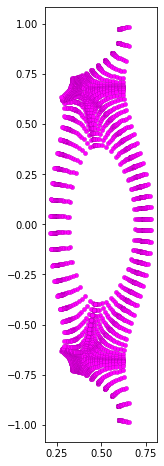

In [149]:
fig, ax = plt.subplots(figsize = (2,8))
R = self.ds.R
Z = self.ds.Z
ax.scatter(x = self.ds.R, y = self.ds.Z, s = 20, c = "magenta", edgecolors = "black", linewidths = 0.1)

In [152]:
self.ds.isel(R = 0, Z = 0)

ValueError: Dimensions {'Z', 'R'} do not exist. Expected one or more of Frozen({'x': 32, 'theta': 104, 't': 1001})

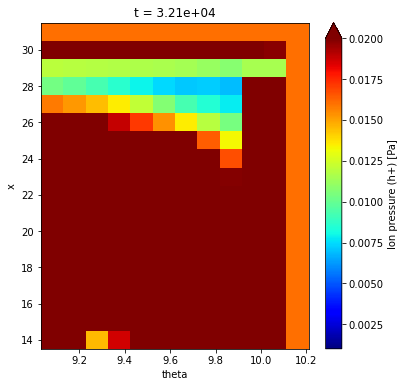

In [60]:
fig, ax = plt.subplots(figsize=(6,6))

r["Ph+"].isel(t=-1).plot(ax = ax, vmin = 0.001, vmax = 0.02, cmap = "jet")

In [46]:
self.ds.regions.keys()

dict_keys(['lower_inner_PFR', 'lower_inner_SOL', 'inner_core', 'inner_SOL', 'upper_inner_PFR', 'upper_inner_SOL', 'upper_outer_PFR', 'upper_outer_SOL', 'outer_core', 'outer_SOL', 'lower_outer_PFR', 'lower_outer_SOL'])

In [ ]:
self = compass

fig, axes = plt.subplots(1,2, figsize = (10,7), gridspec_kw={'width_ratios': [1,3]})

ny = self.ds.metadata["ny"]
jyseps1_1 = self.ds.metadata["jyseps1_1"]
jyseps2_2 = self.ds.metadata["jyseps2_2"]

ax = axes[0]
x = 12
# theta = np.r_[0:jyseps1_1+2,jyseps2_2+6+1:ny+8]
theta = np.r_[0:jyseps1_1,jyseps2_2+1:ny]

sr = self.ds["R"].isel(x=x, theta = theta)
sz = self.ds["Z"].isel(x=x, theta = theta)

ax.scatter(x = self.ds["R"], y = self.ds["Z"], s = 2)
ax.scatter(x = sr, y = sz, s = 10, c = "r")
ax.grid()

ax = axes[1]
self.ds["Ph+"].isel(x=[10,9], t=-1).plot(ax = ax, marker = "o", c = "r")
# self.ds["Z"].isel(x=x).plot(ax = ax, marker = "o", c = "r")
ax.grid()